<a href="https://colab.research.google.com/github/jweir136/electrical_grid_stability/blob/master/electrical_grid_stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

data = pd.read_csv("electrical_grid_stability.csv")

In [2]:
data.shape

(10000, 14)

In [27]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


In [4]:
data.isnull().any()

tau1     False
tau2     False
tau3     False
tau4     False
p1       False
p2       False
p3       False
p4       False
g1       False
g2       False
g3       False
g4       False
stab     False
stabf    False
dtype: bool

looks like there are no missing values!

In [5]:
data.corr()['stab']

tau1    0.275761
tau2    0.290975
tau3    0.280700
tau4    0.278576
p1      0.010278
p2      0.006255
p3     -0.003321
p4     -0.020786
g1      0.282774
g2      0.293601
g3      0.308235
g4      0.279214
stab    1.000000
Name: stab, dtype: float64

Looks like none of the features have a very strong corrlation with the predictor.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ed9c6d908>,
      dtype=object)

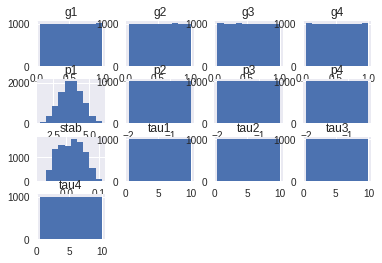

In [7]:
data.hist()

In [0]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

In [0]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, columns):
    self.columns = columns
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    return X[self.columns]

In [0]:
data['stabf'] = pd.get_dummies(data['stabf'])

In [0]:
preprocessing_pipe = FeatureUnion([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=1)),
])

pipe1 = Pipeline([
    ("pre", preprocessing_pipe),
    ("lr", LinearRegression())
])

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = data.drop(['stab'], axis=1)
Y = data['stab']

trainX, testX, trainY, testY = train_test_split(X.values, Y.values, test_size=.2)

trainX = pd.DataFrame(trainX, columns=X.keys())
trainY = pd.DataFrame(trainY, columns=['stab'])

In [20]:
params = {
    "pre__poly__degree":[1,2,3,4]
}

grid = GridSearchCV(pipe1, params, cv=5, scoring='neg_mean_squared_error', verbose=3)
grid.fit(trainX, trainY)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] pre__poly__degree=1 .............................................
[CV]  pre__poly__degree=1, score=-0.00024806365905520584, total=   0.0s
[CV] pre__poly__degree=1 .............................................
[CV]  pre__poly__degree=1, score=-0.00024957882238602443, total=   0.0s
[CV] pre__poly__degree=1 .............................................
[CV]  pre__poly__degree=1, score=-0.0002419829749316954, total=   0.0s
[CV] pre__poly__degree=1 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] . pre__poly__degree=1, score=-0.000257922276461016, total=   0.0s
[CV] pre__poly__degree=1 .............................................
[CV]  pre__poly__degree=1, score=-0.0002588816075006103, total=   0.0s
[CV] pre__poly__degree=2 .............................................
[CV]  pre__poly__degree=2, score=-9.852602137732374e-05, total=   0.2s
[CV] pre__poly__degree=2 .............................................
[CV]  pre__poly__degree=2, score=-0.00010323916364834428, total=   0.1s
[CV] pre__poly__degree=2 .............................................
[CV]  pre__poly__degree=2, score=-0.00010251006948264363, total=   0.2s
[CV] pre__poly__degree=2 .............................................
[CV] . pre__poly__degree=2, score=-9.96231060151138e-05, total=   0.1s
[CV] pre__poly__degree=2 .............................................
[CV]  pre__poly__degree=2, score=-0.00010827728131919436, total=   0.1s
[CV] pre__poly__degree=3 .............................................
[CV

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pre', FeatureUnion(n_jobs=None,
       transformer_list=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False))],
       transformer_weights=None)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'pre__poly__degree': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [21]:
grid.best_params_

{'pre__poly__degree': 4}

The data has a degree of 4!

In [0]:
import numpy as np

In [26]:
np.sqrt(-grid.best_score_)

0.00708858269853102

Not too bad of a score!